In [114]:
#import pandas as pd
#import numpy
#import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress

#attatch the CSV file 

csvfile = '/Users/miguelvelez/Desktop/merged_data.csv'

df = pd.read_csv(csvfile)

pet_data.head()

,id.1,organization_id,age,gender,size,coat,tags,name_x,description,status,...,colors.primary,attributes.spayed_neutered,attributes.house_trained,special_needs,shots_current,contact.address.city,contact.address.postcode,animal_id,organization_id.1,name_y
0,49799665,TX1818,Baby,Female,Medium,NaN,[],gd Nyx,You can fill out an adoption application onlin...,adopted,...,NaN,True,False,False,False,Pipe Creek,78063,49799665,TX1818,A Doggie 4 You
1,49799666,TX1818,Adult,Male,Small,NaN,[],Rogue,You can fill out an adoption application onlin...,adopted,...,NaN,True,True,False,False,Pipe Creek,78063,49799666,TX1818,A Doggie 4 You
2,49798311,TX1818,Young,Male,Small,NaN,[],Todd,You can fill out an adoption application onlin...,adopted,...,NaN,True,True,False,True,Pipe Creek,78063,49798311,TX1818,A Doggie 4 You
3,49798148,TX1818,Young,Male,Small,NaN,[],O'Ryan,You can fill out an adoption application onlin...,adopted,...,NaN,True,False,False,False,Pipe Creek,78063,49798148,TX1818,A Doggie 4 You
4,49794961,TX1207,Young,Female,Medium,NaN,[],Sophia,** This dog is in a foster home in San Antonio...,adopted,...,NaN,True,False,False,True,Helotes,78023,49794961,TX1207,San Antonio Great Dane Rescue


In [115]:
#find out the number of pets with shots vs pets without shots: the value is: attributes.shots_current
df.shots_current.value_counts()


#vaccinated = len(pet_data["shots_current"].count())
#print(vaccinated)


True     5725
False    1791
Name: shots_current, dtype: int64

In [116]:
df.shots_current.value_counts().loc[False]



1791

In [117]:
df.shots_current.value_counts().loc[True]


5725

In [118]:
#make the data frame for the above findings

shot_data = pet_data.groupby('shots_current')

shot_data_count = pd.DataFrame(shot_data['shots_current'].count())

#view

shot_data_count.head()

,shots_current
shots_current,
False,1791
True,5725


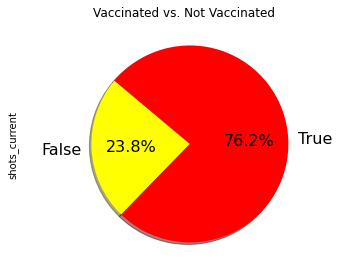

In [119]:


#shot_data_count.plot(kind='pie', shadow = True, startangle=140, figsize=(6,4), aitopct= '%1.1f%%')
#plot.axis("equal")
#plot.show()

#pandas pie
shot_data_count.plot(kind='pie', subplots= True, title="Vaccinated vs. Not Vaccinated",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["yellow","red"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
#plt.savefig("figures/PandaPieChart.png")
plt.show()


In [120]:
total_shelters= len(pet_data["organization_id"].unique())
print('---------------------------------------')
print("Total Numer Of Shelters")
print(total_shelters)
print('---------------------------------------')

---------------------------------------
Total Numer Of Shelters
123
---------------------------------------


In [121]:
#shelter_size= pet_data.groupby("organization_id")

shelter_size_count= pd.DataFrame(shelter_size["organization_id.1"].count())

print(shelter_size_count)
shelter_size_count.max()


                 organization_id.1
organization_id                   
TX1002                           8
TX1006                           8
TX1030                          66
TX1053                           1
TX1054                           1
...                            ...
TX95                           259
TX953                          129
TX979                          142
TX988                          668
TX993                          140

[123 rows x 1 columns]


organization_id.1    668
dtype: int64

In [122]:
print('--------------------------------------------------------')
print("Number of dogs associated with Largest Shelter: 668")
print("Largest Shelter: SNIPSA.inc")
print('--------------------------------------------------------')

--------------------------------------------------------
Number of dogs associated with Largest Shelter: 668
Largest Shelter: SNIPSA.inc
--------------------------------------------------------


In [123]:

#here I copied the largest shelter from the main file into another csv and read it in as csv2

csv2= '/Users/miguelvelez/Desktop/large.csv'

large= pd.read_csv(csv2)

large.head()



,id.1,organization_id,age,gender,size,coat,tags,name_x,description,status,...,colors.primary,attributes.spayed_neutered,attributes.house_trained,special_needs,shots_current,contact.address.city,contact.address.postcode,animal_id,organization_id.1,name_y
0,49774956,TX988,Baby,Female,Medium,Short,"['Playful', 'energetic', 'loving', 'happy', 'l...",Robin,Have you met… Robin?\n\nRobin comes from a lit...,adopted,...,Apricot / Beige,True,False,False,False,San Antonio,78209,49774956,TX988,SNIPSA Inc.
1,49763712,TX988,Young,Female,Medium,Short,[],Lulu,Lulu loves you already — and you’ve only just ...,adopted,...,Brindle,True,False,False,True,San Antonio,78209,49763712,TX988,SNIPSA Inc.
2,49763210,TX988,Young,Female,Medium,Short,[],Noche,Meet Noche!\n\nLittle Noche is a super sweet a...,adopted,...,Black,True,False,False,True,San Antonio,78209,49763210,TX988,SNIPSA Inc.
3,49761306,TX988,Young,Male,Large,Long,[],REggie,Rescued with a few other wandering big dogs fr...,adopted,...,Black,True,False,False,True,San Antonio,78209,49761306,TX988,SNIPSA Inc.
4,49696332,TX988,Young,Female,Medium,Medium,[],Gabby,Gabby is as sweet as her coat is white and wou...,adopted,...,White / Cream,True,False,False,True,San Antonio,78209,49696332,TX988,SNIPSA Inc.


In [124]:
breeds=large.groupby("breeds.primary")

breeds_count= pd.DataFrame(breeds["breeds.primary"].count())
print(breeds_count)
#print(breeds)


                                      breeds.primary
breeds.primary                                      
Airedale Terrier                                   5
American Bulldog                                   1
Anatolian Shepherd                                 3
Australian Cattle Dog / Blue Heeler               29
Australian Shepherd                               14
Basset Hound                                       6
Beagle                                             2
Black Mouth Cur                                    1
Border Collie                                     29
Boston Terrier                                     1
Boxer                                             19
Bull Terrier                                       1
Catahoula Leopard Dog                             19
Chihuahua                                         77
Chiweenie                                          2
Collie                                            45
Corgi                                         

In [125]:
breeds_count.max()


breeds.primary    77
dtype: int64